In [82]:
%pip install plotly -q

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [83]:
path= "D:\\alura\\challenge\\challenge2-data-science-LATAM\\TelecomX_Data.json"
data_1= pd.read_json(path)
pd.DataFrame(data_1).head(3)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [84]:
lista_nrm=['customer', 'phone', 'internet', 'account']
data_1_normalizado_1 = pd.concat([pd.json_normalize(data_1[col]) for col in lista_nrm], axis=1)
data_1_concat= pd.concat([data_1.drop(columns=lista_nrm), data_1_normalizado_1], axis=1)
data_1_concat.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [85]:
data_1_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [86]:
data_1_concat.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [87]:
datos_columns_drop=['customerID','gender', 'Partner', 'Dependents']

data_final=data_1_concat.drop(columns=datos_columns_drop)
data_final['Charges.Total']= data_final['Charges.Total'].replace(' ', 0).astype(float)

cols = [
    'Churn', 'PhoneService', 'PaperlessBilling',
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

mapping = {
    'No': 0,
    'Yes': 1
}

for col in cols:
    data_final[col] = data_final[col].map(mapping).fillna(2).astype(int)

In [88]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   SeniorCitizen     7267 non-null   int64  
 2   tenure            7267 non-null   int64  
 3   PhoneService      7267 non-null   int64  
 4   MultipleLines     7267 non-null   int64  
 5   InternetService   7267 non-null   object 
 6   OnlineSecurity    7267 non-null   int64  
 7   OnlineBackup      7267 non-null   int64  
 8   DeviceProtection  7267 non-null   int64  
 9   TechSupport       7267 non-null   int64  
 10  StreamingTV       7267 non-null   int64  
 11  StreamingMovies   7267 non-null   int64  
 12  Contract          7267 non-null   object 
 13  PaperlessBilling  7267 non-null   int64  
 14  PaymentMethod     7267 non-null   object 
 15  Charges.Monthly   7267 non-null   float64
 16  Charges.Total     7267 non-null   float64


In [89]:
for col in data_final.columns:
    if data_final[col].dtype == 'object':
        print(f'Columna: {col} - Valores únicos: {data_final[col].unique()}')

Columna: InternetService - Valores únicos: ['DSL' 'Fiber optic' 'No']
Columna: Contract - Valores únicos: ['One year' 'Month-to-month' 'Two year']
Columna: PaymentMethod - Valores únicos: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [175]:
data_final.describe()

,Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.318839,0.162653,32.346498,0.902711,0.616348,0.721068,0.779689,0.777900,0.724646,0.819045,0.822623,0.593230,64.720098,2277.182035
std,0.528079,0.369074,24.571773,0.296371,0.656583,0.797706,0.779086,0.779726,0.796705,0.763812,0.762307,0.491265,30.129572,2268.648587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000
50%,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.300000,1389.200000
75%,1.000000,0.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000
max,2.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,118.750000,8684.800000


In [180]:
servicios_original=['PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies']
servicios_adicional=['TechSupport', 'DeviceProtection', 'OnlineBackup',  'OnlineSecurity' ]

In [181]:
data_final['servicios_totales'] = data_final.loc[:, servicios_original + servicios_adicional].eq(1).sum(axis=1)

In [187]:
correlacion = data_final[['Churn', 'servicios_totales','Charges.Monthly', 'Charges.Total']].corr()
correlacion_styled = correlacion.style.background_gradient(cmap='Blues')
correlacion_styled.format('{:.3f}')

,Churn,servicios_totales,Charges.Monthly,Charges.Total
Churn,1.000,-0.061,0.152,-0.164
servicios_totales,-0.061,1.000,0.803,0.797
Charges.Monthly,0.152,0.803,1.000,0.652
Charges.Total,-0.164,0.797,0.652,1.000


Podemos observar que, a medida que el cliente cuenta con un mayor número de servicios contratados, la probabilidad de que se vuelva inactivo disminuye. Asimismo, aunque el pago mensual presenta una relación negativa con la inactividad, dicha relación es débil (correlación ≈ 0.15), lo que indica que, si bien existe una asociación, el monto del cargo mensual no constituye por sí solo una causa determinante de evasión o abandono del servicio.

In [123]:
clientes_no_activos=data_final.loc[data_final['Churn']==0].copy()

clientes_no_activos.head(3)

,Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,0,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
5,0,0,9,1,0,DSL,0,0,0,1,1,1,Month-to-month,1,Credit card (automatic),69.4,571.45


# Analisis de servicios en clientes no activos 

In [173]:
import plotly.express as px

fig = px.pie(
    clientes_no_activos,
    names="SeniorCitizen",
    title="Distribución de clientes <br> según condición de adulto mayor",
     color_discrete_sequence=["#CFE8FF", "#6BAED6"]
)

fig.update_layout(
    title={
        "x": 0.5,
        "xanchor": "center"
    },
    width=400,
    height=400
)

fig.update_traces(textinfo='percent+label')

fig.show()


Observamos que los clientes inactivos mayores de 65 años representan únicamente el 12 % del total, lo cual indica que la inactividad no se explica principalmente por la edad, sino que estaría asociada a factores internos relacionados con los servicios ofrecidos. Este resultado sugiere la existencia de fallas en uno o más componentes del servicio, las cuales deben ser analizadas y corregidas para mejorar la retención de clientes.

In [ ]:


clientes_no_activos_servicios= clientes_no_activos[servicios_original]
conteo_servicios=pd.DataFrame(clientes_no_activos_servicios.where(clientes_no_activos_servicios==1).count().sort_values(ascending=False))
conteo_servicios.reset_index(inplace=True)
conteo_servicios.columns=['Servicio', 'Cantidad de clientes no activos']    
conteo_servicios

,Servicio,Cantidad de clientes no activos
0,PhoneService,4662
1,MultipleLines,2121
2,StreamingMovies,1914
3,StreamingTV,1893


In [93]:
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8,4))
  ax.set_frame_on(False)
  ax.xaxis.set_visible(False)
  ax.tick_params(axis='y',which='both',size=0)
  ax = sns.barplot(data=conteo_servicios,x='Cantidad de clientes no activos',y= conteo_servicios['Servicio'],hue=conteo_servicios['Servicio'],orient='h',
                   palette=palette, legend=False)
  ax.set_title('Cantidad de clientes no activos por servicio contratado',
              loc='left',fontsize=16)
  ax.set_xlabel('Cantidad',fontsize=14)
  for i,j in enumerate(conteo_servicios['Cantidad de clientes no activos']):
    ax.text(j+20,i,str(j),color='black',fontsize=9,ha='left',va='center')
  plt.show()

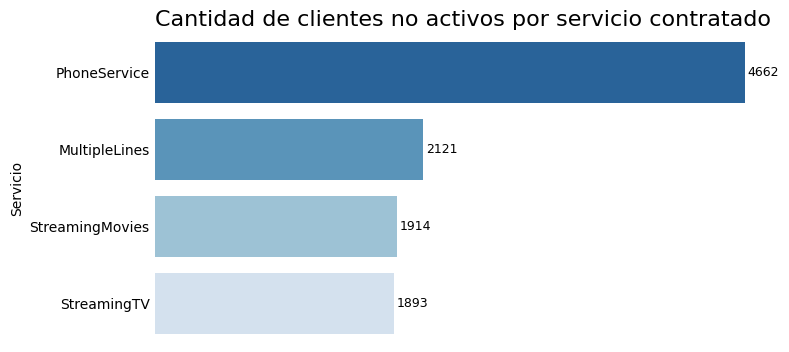

In [94]:
generar_grafico('Blues_r')

In [ ]:
clientes_no_activos_servicios_adicional= clientes_no_activos[ servicios_adicional]
conteo_servicios_adicional=pd.DataFrame(clientes_no_activos_servicios_adicional.where(clientes_no_activos_servicios_adicional==1).count().sort_values(ascending=False))
conteo_servicios_adicional.reset_index(inplace=True)
conteo_servicios_adicional.columns=['Servicio', 'Cantidad de clientes no activos']    
conteo_servicios_adicional

,Servicio,Cantidad de clientes no activos
0,OnlineBackup,1906
1,DeviceProtection,1877
2,TechSupport,1734
3,OnlineSecurity,1724


In [96]:
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8,4))
  ax.set_frame_on(False)
  ax.xaxis.set_visible(False)
  ax.tick_params(axis='y',which='both',size=0)
  ax = sns.barplot(data=conteo_servicios_adicional,x='Cantidad de clientes no activos',y= conteo_servicios_adicional['Servicio'],hue=conteo_servicios_adicional['Servicio'],orient='h',
                   palette=palette, legend=False)
  ax.set_title('Cantidad de clientes no activos por servicio contratado adiconal',
              loc='left',fontsize=16)
  ax.set_xlabel('Cantidad',fontsize=14)
  for i,j in enumerate(conteo_servicios_adicional['Cantidad de clientes no activos']):
    ax.text(j+20,i,str(j),color='black',fontsize=9,ha='left',va='center')
  plt.show()

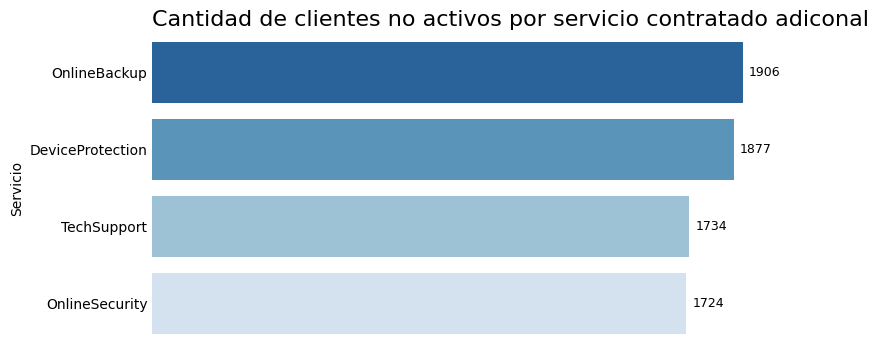

In [97]:
generar_grafico('Blues_r')

In [98]:
servicios_categoticos= clientes_no_activos[['InternetService', 'Contract', 'PaymentMethod']]
internet_cat=servicios_categoticos['InternetService'].value_counts()
contract_cat=servicios_categoticos['Contract'].value_counts()
payment_cat=servicios_categoticos['PaymentMethod'].value_counts()

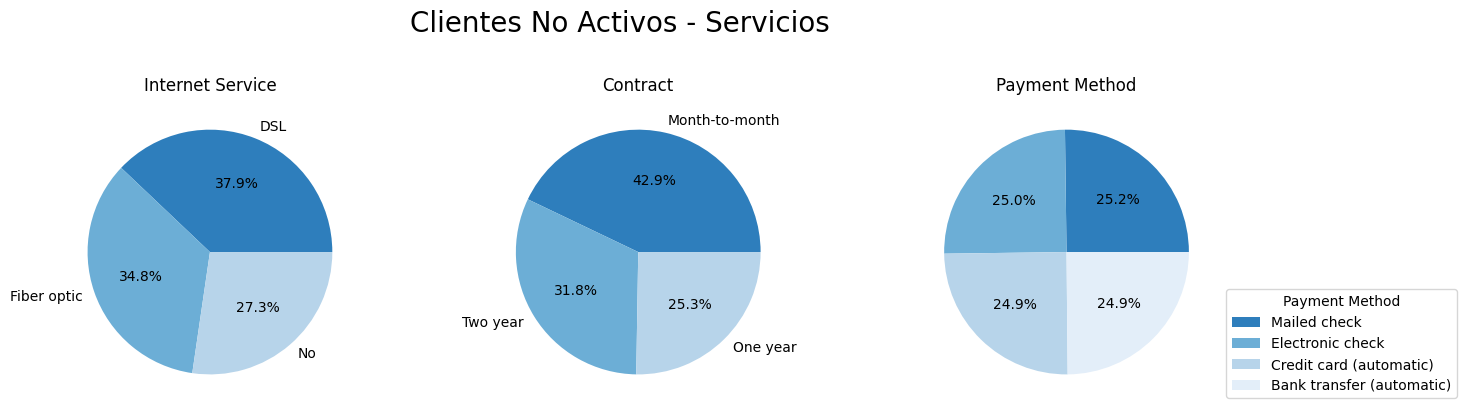

In [99]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(wspace=0.4)
plt.suptitle('Clientes No Activos - Servicios', fontsize=20)

# Internet Service
colors = plt.cm.Blues_r(np.linspace(0.3, 0.9,4))

axs[0].pie(internet_cat.values, labels=internet_cat.index, autopct='%1.1f%%' , colors=colors)
axs[0].set_title('Internet Service')

# Contract
axs[1].pie(contract_cat.values, labels=contract_cat.index, autopct='%1.1f%%', colors=colors)
axs[1].set_title('Contract')

axs[2].pie(payment_cat.values, autopct='%1.1f%%', colors=colors)
axs[2].legend(payment_cat.index, title="Payment Method", loc="lower left", bbox_to_anchor=(1, 0, 0.5, 1))
axs[2].set_title('Payment Method')

plt.show()


    Se observqa que no habria porblemas con el metodo de pago ya que hay una distribucion casi equilibrada de los datos, asi mismo con el internet a pesar que 72.7% que han tenido este servico se han retirado no se puede afirmar que sea porr la calidad de uno sobre el otro. 

In [100]:
contrato_mes_tipo = clientes_no_activos[['Contract', 'tenure']]


In [101]:
import plotly.express as px
fig = px.box(contrato_mes_tipo, x="Contract", y="tenure")
fig.update_layout(
    title={
        "text": " Distribución de la duración del contrato según el tipo de contrato",
        "x": 0.5,
        "xanchor": "center"},
    width=800,
    height=500
)

fig.show()

 Podemos apreciar que el tipo de contrato de los que mas se han retiro son de tipo mes a mes con un 42.9% y un con una mediana de 16 meses siendo el tiempo en el cual se retiran. 

# Analisis de clientes de contrato mes a mes 
 Se analizara de este tipo de contrato los posibles causas por las cuales se retiran ya que abarca un 42% de los que se retiran del servicio. 

In [157]:

clientes_no_activos['Cnd_serv_por_cliente'] = (clientes_no_activos.loc[:, servicios_original].eq(1).sum(axis=1)
)
clientes_no_activos['Cnd_serv_por_cliente_adicional'] = (clientes_no_activos.loc[:, servicios_adicional].eq(1).sum(axis=1))

In [158]:
mes_mes_charges=clientes_no_activos.loc[clientes_no_activos['Contract']=='Month-to-month', ['Cnd_serv_por_cliente', 'Cnd_serv_por_cliente_adicional', 'Charges.Monthly', 'Charges.Total']]
mes_mes_charges.head(3)

,Cnd_serv_por_cliente,Cnd_serv_por_cliente_adicional,Charges.Monthly,Charges.Total
1,3,0,59.9,542.40
5,3,1,69.4,571.45
8,1,1,48.2,340.35


In [159]:
tabla_mes_ser_original=mes_mes_charges.groupby('Cnd_serv_por_cliente').agg(
    Cantidad=('Cnd_serv_por_cliente', 'count'), 
    Promedio_Mensual=('Charges.Monthly', 'mean'), 
    Promedio_Total=('Charges.Total', 'mean'))
tabla_mes_ser_original.insert(1, 'Porcentaje de clientes', (tabla_mes_ser_original['Cantidad'] / tabla_mes_ser_original['Cantidad'].sum()) * 100)
tabla_mes_ser_original_estilos= tabla_mes_ser_original.style

In [160]:

encabezado = {
              'selector':'th',
              'props':'font-weight:bold; font-family:Arial; text-align:center; background-color:white; color: black'
}

celdas = {
              'selector':'td',
              'props':'background-color:white;font-family:Arial; text-align:center; color:black'
}

tabla_mes_ser_original_estilos.set_table_styles([encabezado,celdas])
tabla_mes_ser_original_estilos.format({'Promedio_Mensual':'{:.2f}', 'Promedio_Total':'{:.2f}', 'Porcentaje de clientes':'{:.2f} %'})\
                    .bar(subset='Porcentaje de clientes',vmin=0,vmax=100,color='#9cd3bb')


,Cantidad,Porcentaje de clientes,Promedio_Mensual,Promedio_Total
Cnd_serv_por_cliente,,,,
0,128,5.77 %,30.25,511.14
1,921,41.49 %,42.33,641.13
2,594,26.76 %,68.27,1616.00
3,371,16.71 %,86.99,2532.58
4,206,9.28 %,100.80,3996.54


In [161]:
tabla_mes_ser_adicional=mes_mes_charges.groupby('Cnd_serv_por_cliente_adicional').agg(
    Cantidad=('Cnd_serv_por_cliente_adicional', 'count'), 
    Promedio_Mensual=('Charges.Monthly', 'mean'), 
    Promedio_Total=('Charges.Total', 'mean'))
tabla_mes_ser_adicional.insert(1, 'Porcentaje de clientes', (tabla_mes_ser_adicional['Cantidad'] / tabla_mes_ser_adicional['Cantidad'].sum()) * 100)
tabla_mes_ser_adicional_estilos= tabla_mes_ser_adicional.style

In [162]:

encabezado = {
              'selector':'th',
              'props':'font-weight:bold; font-family:Arial; text-align:center; background-color:white; color: black'
}

celdas = {
              'selector':'td',
              'props':'background-color:white;font-family:Arial; text-align:center; color:black'
}

tabla_mes_ser_adicional_estilos.set_table_styles([encabezado,celdas])
tabla_mes_ser_adicional_estilos.format({'Promedio_Mensual':'{:.2f}', 'Promedio_Total':'{:.2f}', 'Porcentaje de clientes':'{:.2f} %'})\
                    .bar(subset='Porcentaje de clientes',vmin=0,vmax=100,color='#FA0030')
                     


,Cantidad,Porcentaje de clientes,Promedio_Mensual,Promedio_Total
Cnd_serv_por_cliente_adicional,,,,
0,924,41.62 %,43.78,642.44
1,647,29.14 %,69.82,1683.20
2,449,20.23 %,76.04,2404.62
3,175,7.88 %,82.57,3044.98
4,25,1.13 %,89.04,3339.80


Se puede apreciar que el grupo cero, correspondiente a los clientes que cuentan con el servicio de internet ya mayoria  de tipo DLM, no presenta una problemática significativa en términos de comportamiento. Sin embargo, se observa que el 41 % de los clientes presenta únicamente un servicio activo, siendo el servicio de línea móvil el más frecuente, lo cual sugiere que gran parte de la problemática de pérdida de clientes puede estar asociada a este segmento.

Asimismo, al analizar a los clientes que adquieren cuatro servicios adicionales junto con los servicios originales, se evidencia que la tendencia de abandono disminuye progresivamente. Este comportamiento indica que la diversificación y combinación de servicios actúa como un factor de retención, reduciendo la probabilidad de pérdida de clientes.

En este sentido, resulta fundamental fortalecer las estrategias comerciales orientadas a la contratación de múltiples servicios, con el objetivo de incrementar la fidelización y minimizar las pérdidas de clientes. Los resultados muestran que cuando los clientes adquieren el paquete completo de servicios, el comportamiento es más favorable para la mayoría del público, ya que el incremento en el número de servicios hasta un total de ocho se traduce únicamente en un aumento moderado del costo, generando una mejor percepción de valor.